In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.drop(['id', "zipcode"], axis=1, inplace=True)

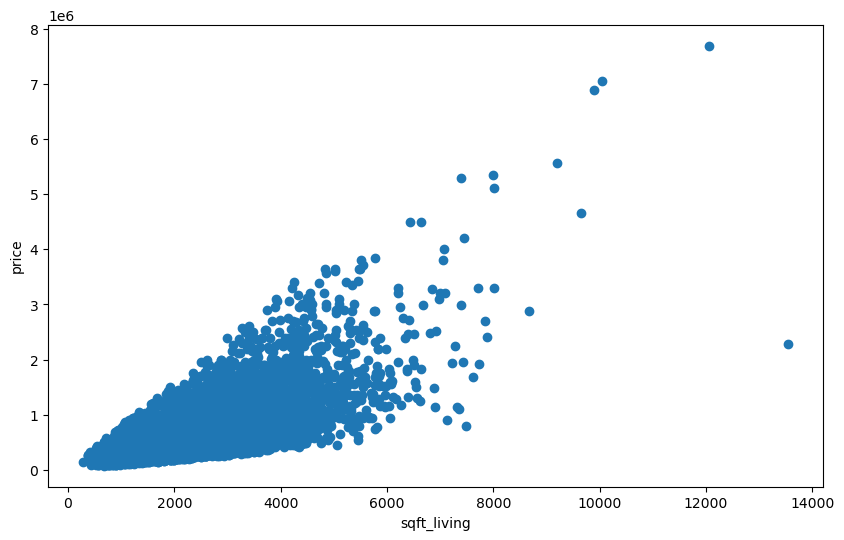

In [4]:
# Scatter plot of price vs. sqft_living
plt.figure(figsize=(10,6))
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

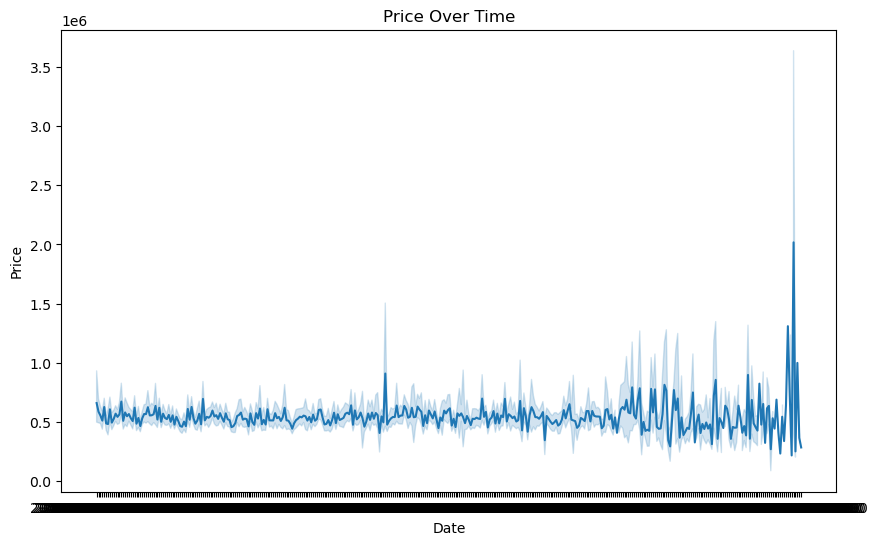

In [5]:
# Line plot of price over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='price', data=df)
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

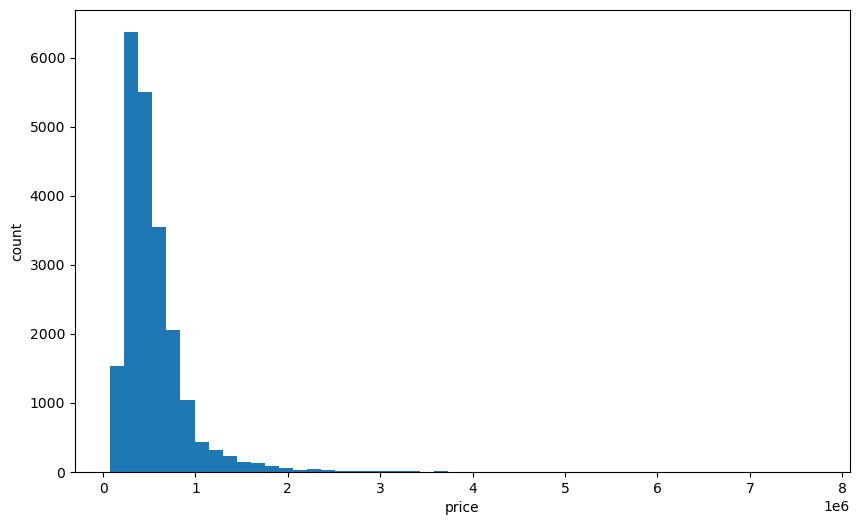

In [6]:
# Histogram of price
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=50)
plt.xlabel('price')
plt.ylabel('count')
plt.show()

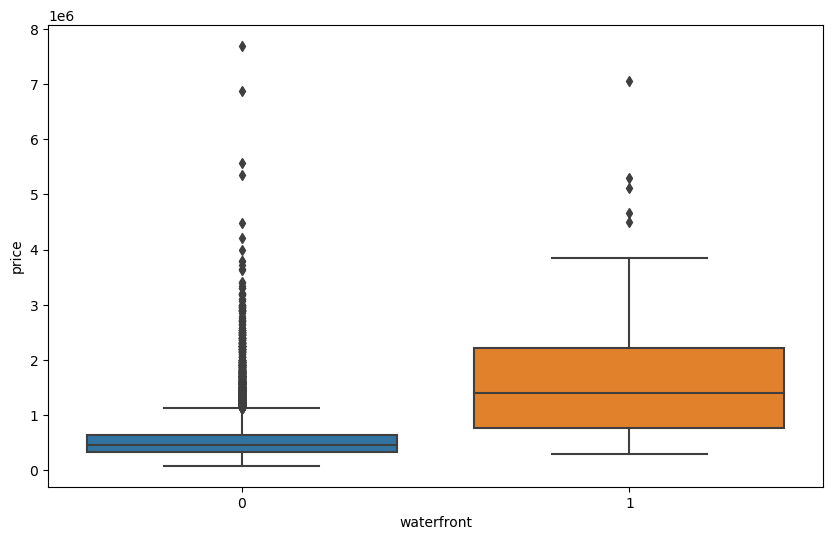

In [7]:
# Box plot of price by waterfront
plt.figure(figsize=(10,6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.show()

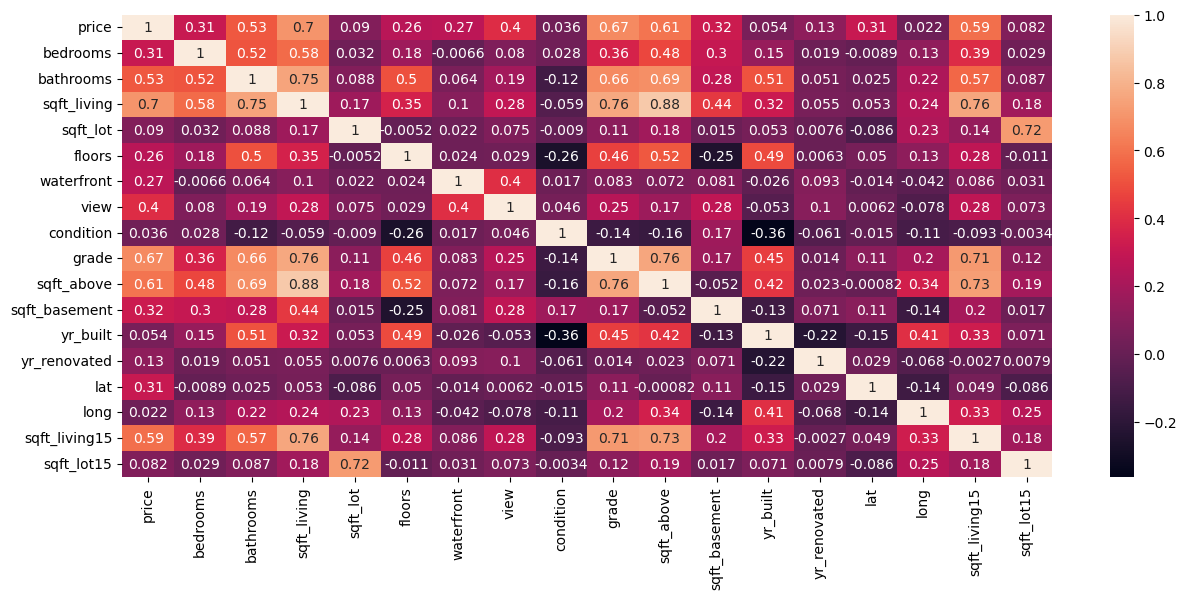

In [8]:
# Heatmap of correlations
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

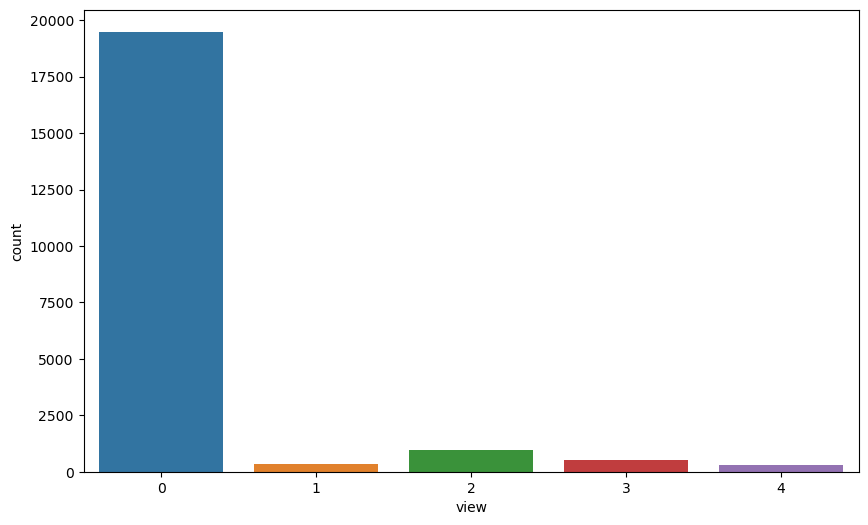

In [9]:
# bar chart of frequency of view
plt.figure(figsize=(10,6))
sns.countplot(x='view', data=df)
plt.show()

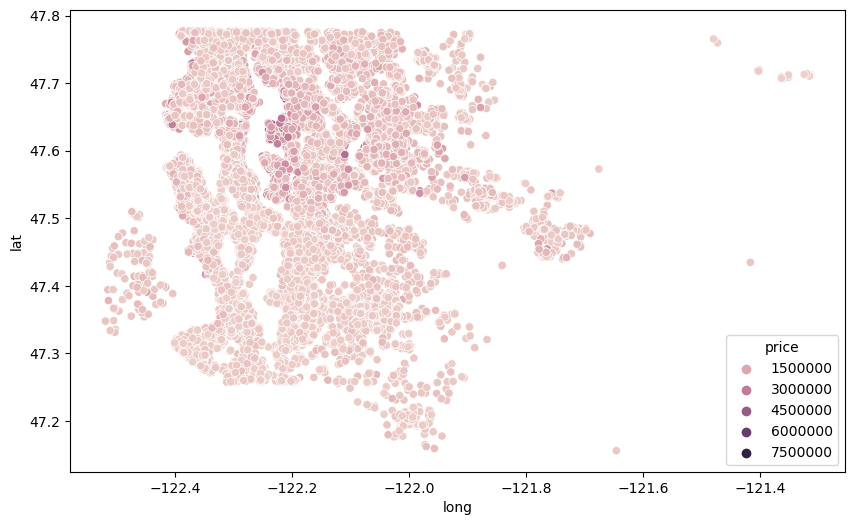

In [10]:
# Map plot of latitude and longitude
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='lat', data=df, hue='price')
plt.show()

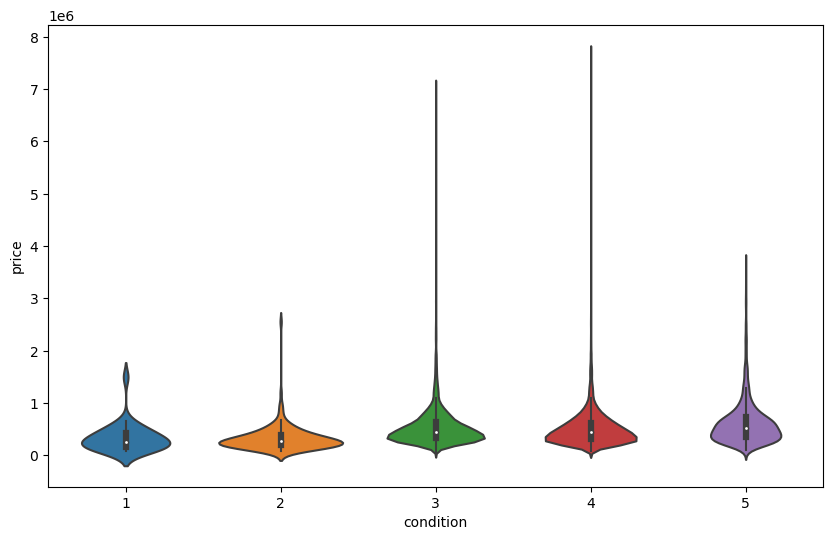

In [11]:
# Violin plot of price by condition
plt.figure(figsize=(10,6))
sns.violinplot(x='condition', y='price', data=df)
plt.show()

# Feature engineering

In [12]:
df['age'] = 2023 - df['yr_built']
df['renovated'] = (df['yr_renovated'] > 0).astype(int)
df['age_renovated'] = df['age'] * df['renovated']
df['log_sqft_living'] = np.log(df['sqft_living'])

# Time Series Analysis

In [13]:
from datetime import datetime

In [14]:
# Convert the date column to a datetime object
df['date'] = pd.to_datetime(df['date'])

In [15]:
# Remove duplicates
df.drop_duplicates(subset=['date'], inplace=True)

In [16]:
# Set the date column as the index and set a frequency of one month
df.set_index('date', inplace=True)

In [17]:
# create a date range with the appropriate frequency (in this case, daily)
idx = pd.date_range(df.index.min(), df.index.max(), freq='D')

In [18]:
# reindex the dataframe with the new date range
df = df.reindex(idx)

In [19]:
# Find the rows with out of bounds date values
out_of_bounds_dates = df.index[(df.index < pd.Timestamp.min) | (df.index > pd.Timestamp.max)]

In [20]:
# Remove the rows with out of bounds date values
df = df.drop(out_of_bounds_dates)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age,renovated,age_renovated,log_sqft_living
2014-05-02,313000.0,3.0,1.50,1340.0,7912.0,1.5,0.0,0.0,3.0,7.0,...,1955.0,0.0,47.7658,-122.339,1480.0,7940.0,68.0,0.0,0.0,7.200425
2014-05-03,625000.0,4.0,2.75,2920.0,6605.0,2.0,0.0,0.0,3.0,8.0,...,2012.0,0.0,47.4909,-122.144,3030.0,6605.0,11.0,0.0,0.0,7.979339
2014-05-04,775000.0,2.0,2.50,2680.0,7392.0,1.0,0.0,0.0,3.0,9.0,...,2004.0,0.0,47.7170,-122.026,2315.0,7045.0,19.0,0.0,0.0,7.893572
2014-05-05,560000.0,3.0,2.50,1900.0,8744.0,2.0,0.0,0.0,3.0,8.0,...,1987.0,0.0,47.6200,-122.043,2030.0,8744.0,36.0,0.0,0.0,7.549609
2014-05-06,397000.0,4.0,2.00,1440.0,7680.0,1.0,0.0,0.0,3.0,7.0,...,1971.0,0.0,47.7245,-122.200,1460.0,9660.0,52.0,0.0,0.0,7.272398


# Split the data into training and testing sets

In [21]:
train = df[:'2014']
test = df['2015':]

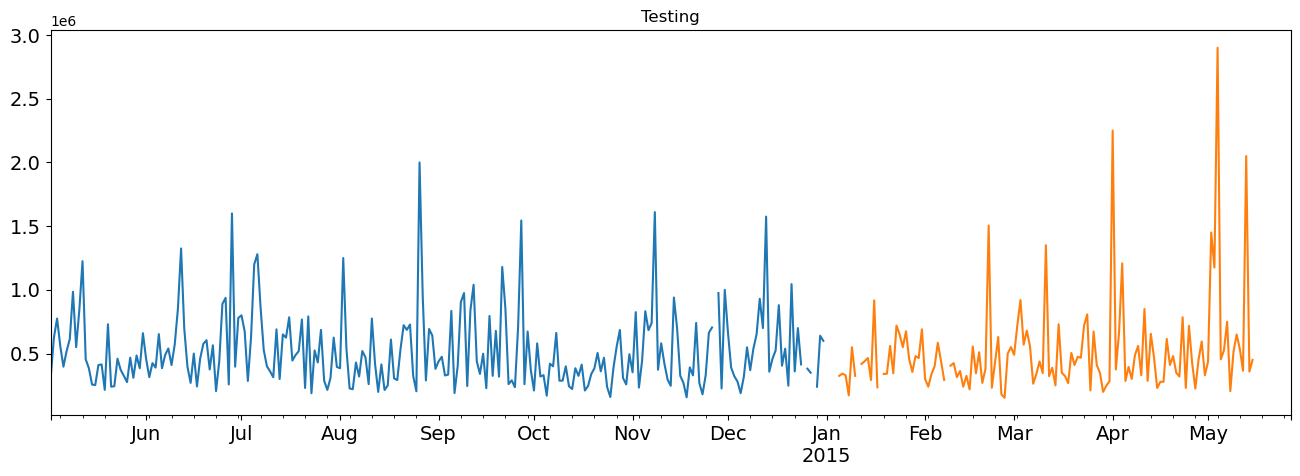

In [22]:
# Plot the training and testing sets
train['price'].plot(figsize=(16,5), title= 'Training', fontsize=14)
test['price'].plot(figsize=(16,5), title= 'Testing', fontsize=14)
plt.show()

# Fit the ARIMA Model

In [23]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['price'], order=(2, 1, 2), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()

In [24]:
# make predictions for the test data using the fitted model
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

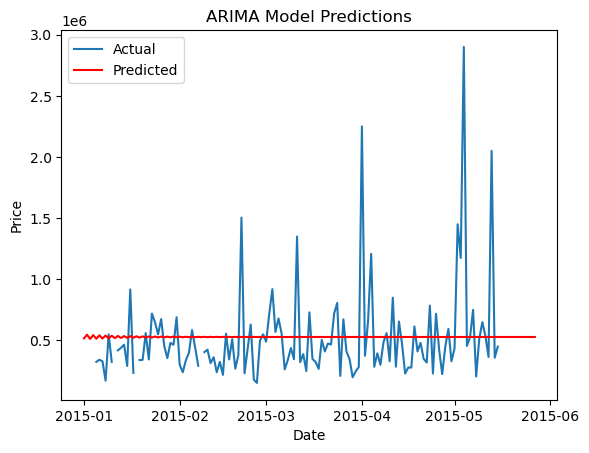

In [25]:
# Plot the predictions and the actual values
plt.plot(test['price'])
plt.plot(predictions, color='red')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [26]:
# Evaluate the model performance using RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

# Evaluate the model performance using RMSE
rmse = np.sqrt(np.mean((predictions - test['price'])**2))
print('RMSE:', rmse)

RMSE: 384228.66980447905


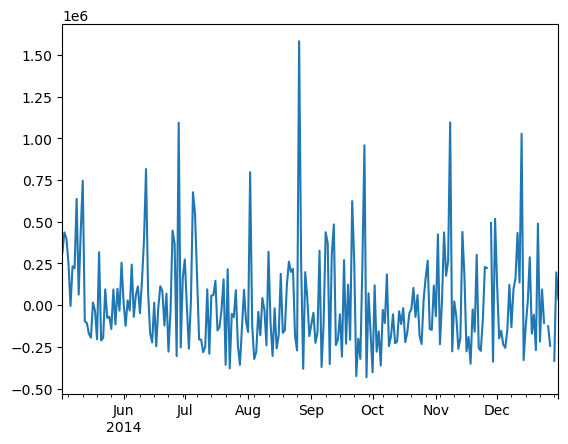

In [27]:
# Plot the model residuals
model_fit.resid.plot()
plt.show()

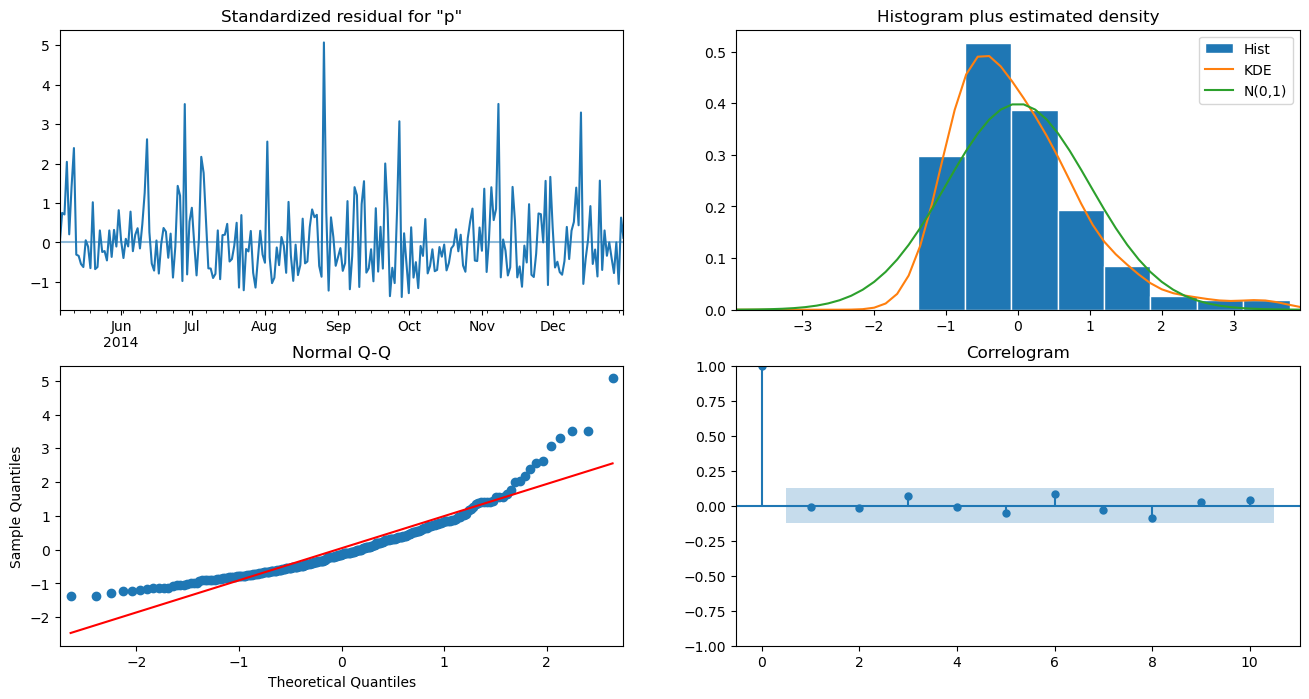

In [28]:
# Plot future predictions
model_fit.plot_diagnostics(figsize=(16,8))
plt.show()

In [29]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age,renovated,age_renovated,log_sqft_living
2014-05-02,313000.0,3.0,1.50,1340.0,7912.0,1.5,0.0,0.0,3.0,7.0,...,1955.0,0.0,47.7658,-122.339,1480.0,7940.0,68.0,0.0,0.0,7.200425
2014-05-03,625000.0,4.0,2.75,2920.0,6605.0,2.0,0.0,0.0,3.0,8.0,...,2012.0,0.0,47.4909,-122.144,3030.0,6605.0,11.0,0.0,0.0,7.979339
2014-05-04,775000.0,2.0,2.50,2680.0,7392.0,1.0,0.0,0.0,3.0,9.0,...,2004.0,0.0,47.7170,-122.026,2315.0,7045.0,19.0,0.0,0.0,7.893572
2014-05-05,560000.0,3.0,2.50,1900.0,8744.0,2.0,0.0,0.0,3.0,8.0,...,1987.0,0.0,47.6200,-122.043,2030.0,8744.0,36.0,0.0,0.0,7.549609
2014-05-06,397000.0,4.0,2.00,1440.0,7680.0,1.0,0.0,0.0,3.0,7.0,...,1971.0,0.0,47.7245,-122.200,1460.0,9660.0,52.0,0.0,0.0,7.272398


In [30]:
df.isnull().sum()

price              19
bedrooms           19
bathrooms          19
sqft_living        19
sqft_lot           19
floors             19
waterfront         19
view               19
condition          19
grade              19
sqft_above         19
sqft_basement      19
yr_built           19
yr_renovated       19
lat                19
long               19
sqft_living15      19
sqft_lot15         19
age                19
renovated          19
age_renovated      19
log_sqft_living    19
dtype: int64

In [31]:
df.fillna(df.mean(), inplace=True)

In [32]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y=df['price']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Multiple Machine learning algorithm

In [37]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
# Apply Ridge, Lasso, DecisionTreeRegressor, LinearRegression, GradientBoostingRegressor models
models = [Ridge(), Lasso(), DecisionTreeRegressor(), GradientBoostingRegressor(), LinearRegression()]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R2:', r2_score(y_test, y_pred))
    print('')

Ridge()
RMSE: 195747.46469800195
R2: 0.6933008415330435

Lasso()
RMSE: 195619.3569763943
R2: 0.6937021511852255

DecisionTreeRegressor()
RMSE: 233303.6337321178
R2: 0.5643243390061621

GradientBoostingRegressor()
RMSE: 189760.48871814128
R2: 0.711774850532017

LinearRegression()
RMSE: 195618.8168596136
R2: 0.6937038425963642



J:\python\Anaconda\envs\tf-new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.673e+11, tolerance: 2.543e+09
  model = cd_fast.enet_coordinate_descent(


In [39]:
# predict the price of a house with the following features
# bedrooms: 3
# bathrooms: 2
# sqft_living: 2000
# sqft_lot: 5000
# floors: 2
# waterfront: 0
# view: 0
# condition: 4
# grade: 9
# sqft_above: 2000
# sqft_basement: 0
# yr_built: 2000
# yr_renovated: 0
# lat: 47.6
# long: -122.2
# sqft_living15: 2000
# sqft_lot15: 5000

# Create a dataframe with the new values
new_house = pd.DataFrame([[3, 2, 2000, 5000, 2, 0, 0, 4, 9, 2000, 0, 2000, 0, 47.6, -122.2, 2000, 5000]], columns=X.columns)

# Scale the new values
new_house = scaler.transform(new_house)

# Predict the price of the new house
print('Predicted price:', model.predict(new_house)[0])

Predicted price: 599193.280101251


In [40]:
# actual price of the new house
print('Actual price:', df['price'][0])

Actual price: 313000.0


# Apply ensemble learning

In [41]:
from sklearn.ensemble import VotingRegressor
ensemble = VotingRegressor(estimators=[('ridge', Ridge()), ('lasso', Lasso()), ('dt', DecisionTreeRegressor()), ('gbr', GradientBoostingRegressor()), ('lr', LinearRegression())])
ensemble.fit(X_train, y_train)

J:\python\Anaconda\envs\tf-new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.673e+11, tolerance: 2.543e+09
  model = cd_fast.enet_coordinate_descent(


VotingRegressor(estimators=[('ridge', Ridge()), ('lasso', Lasso()),
                            ('dt', DecisionTreeRegressor()),
                            ('gbr', GradientBoostingRegressor()),
                            ('lr', LinearRegression())])

In [42]:
y_pred = ensemble.predict(X_test)

In [43]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 190652.40479944885
R2: 0.7090590397053349


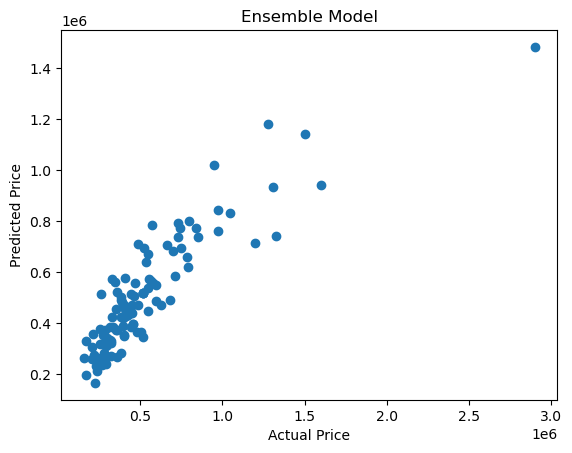

In [44]:
# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Ensemble Model')
plt.show()

In [45]:
# predict the price of a house with the following features
# bedrooms: 3
# bathrooms: 2
# sqft_living: 2000
# sqft_lot: 5000
# floors: 2
# waterfront: 0
# view: 0
# condition: 4
# grade: 9
# sqft_above: 2000
# sqft_basement: 0
# yr_built: 2000
# yr_renovated: 0
# lat: 47.6
# long: -122.2
# sqft_living15: 2000
# sqft_lot15: 5000

# Create a dataframe with the new values
new_house = pd.DataFrame([[3, 2, 2000, 5000, 2, 0, 0, 4, 9, 2000, 0, 2000, 0, 47.6, -122.2, 2000, 5000]], columns=X.columns)

# Scale the new values
new_house_scaled = scaler.transform(new_house)

# Predict the price of the new house
print('Predicted price of the new house:', ensemble.predict(new_house_scaled)[0])

Predicted price of the new house: 611191.4304146089


In [46]:
# actual price of the new house
print('Actual price:', df['price'][0])

Actual price: 313000.0


# Apply Artificial Neural Network

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [49]:
# Create the model
model = Sequential()
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1))

In [50]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [51]:
# Train the model
model.fit(x=X_train, y=y_train.values, validation_data=(X_test, y_test.values), batch_size=128, epochs=50)

Epoch 1/50
3/3 [==============================] - 1s 88ms/step - loss: 367297003520.0000 - val_loss: 389399281664.0000
Epoch 2/50
3/3 [==============================] - 0s 11ms/step - loss: 367296872448.0000 - val_loss: 389399183360.0000
Epoch 3/50
3/3 [==============================] - 0s 11ms/step - loss: 367296708608.0000 - val_loss: 389399085056.0000
Epoch 4/50
3/3 [==============================] - 0s 10ms/step - loss: 367296577536.0000 - val_loss: 389398953984.0000
Epoch 5/50
3/3 [==============================] - 0s 11ms/step - loss: 367296446464.0000 - val_loss: 389398790144.0000
Epoch 6/50
3/3 [==============================] - 0s 11ms/step - loss: 367296315392.0000 - val_loss: 389398691840.0000
Epoch 7/50
3/3 [==============================] - 0s 12ms/step - loss: 367296151552.0000 - val_loss: 389398593536.0000
Epoch 8/50
3/3 [==============================] - 0s 11ms/step - loss: 367295987712.0000 - val_loss: 389398429696.0000
Epoch 9/50
3/3 [==============================] 

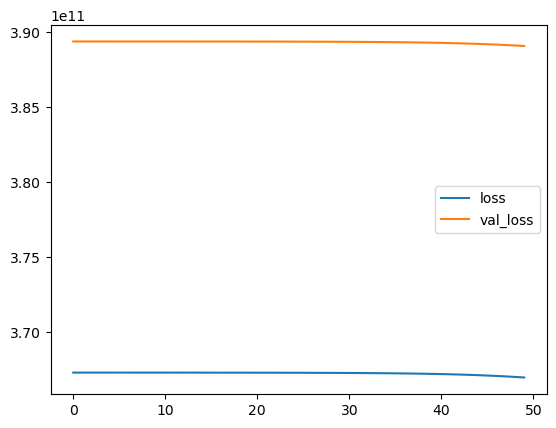

In [52]:
# Plot the loss function
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

In [53]:
# Evaluate the model performance using RMSE
predictions = model.predict(X_test)
rmse = np.sqrt(np.mean((predictions - y_test.values)**2))
print('RMSE:', rmse)

4/4 [==============================] - 0s 977us/step
RMSE: 623846.4744559187


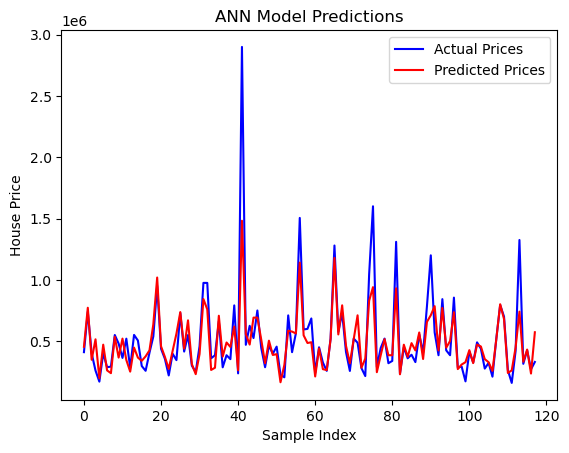

In [54]:
plt.plot(y_test.values, color='blue', label='Actual Prices')
plt.plot(y_pred, color='red', label='Predicted Prices')
plt.title('ANN Model Predictions')
plt.xlabel('Sample Index')
plt.ylabel('House Price')
plt.legend()
plt.show()

In [55]:
# predict the price of a house with the following features
# bedrooms: 3
# bathrooms: 2
# sqft_living: 2000
# sqft_lot: 5000
# floors: 2
# waterfront: 0
# view: 0
# condition: 4
# grade: 9
# sqft_above: 2000
# sqft_basement: 0
# yr_built: 2000
# yr_renovated: 0
# lat: 47.6
# long: -122.2
# sqft_living15: 2000
# sqft_lot15: 5000

# Create a dataframe with the new values
new_house = pd.DataFrame([[3, 2, 2000, 5000, 2, 0, 0, 4, 9, 2000, 0, 2000, 0, 47.6, -122.2, 2000, 5000]], columns=X.columns)

# Predict the price of the new house
print('Predicted price of the new house:', model.predict(new_house)[0][0])

1/1 [==============================] - 0s 61ms/step
Predicted price of the new house: 817597.1


In [56]:
# actual price of the new house
print('Actual price:', df['price'][0])

Actual price: 313000.0
